In [68]:
import pandas as pd
data=pd.read_csv((r"C:\Users\KaKone\Downloads\Checkpoint_3\titanic-passengers.csv"),encoding='utf-8',sep =";")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [103]:
data.dtypes

PassengerId      int64
Survived        object
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [25]:
#Verification des missing values#
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [49]:
#On observe 177 valeurs manquantes pour l'age: nous allons remplacer ces valeurs par l'age moyens des individus#
Age_median = data['Age'].median()
data['Age'].fillna(Age_median, inplace=True)


In [35]:
#Verification des missing values pour l'Age"
data['Age'].isnull().sum()

0

In [36]:
data['Age'].value_counts().describe()

count     88.00000
mean      10.12500
std       22.06303
min        1.00000
25%        2.00000
50%        5.00000
75%       13.00000
max      202.00000
Name: Age, dtype: float64

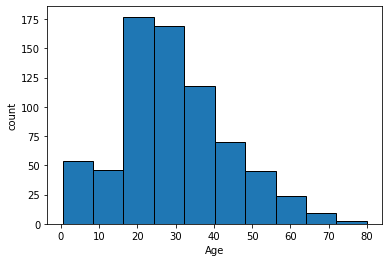

In [35]:
##2. Visualization phase:##
import matplotlib.pyplot as plt
plt.hist(data['Age'], bins=10, edgecolor='black');
plt.xlabel('Age');
plt.ylabel('count');

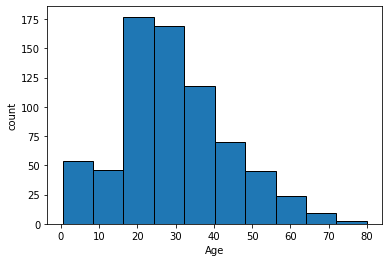

In [3]:
import matplotlib.pyplot as plt
plt.hist(data['Age'], bins=10, edgecolor='black');
plt.xlabel('Age');
plt.ylabel('count');

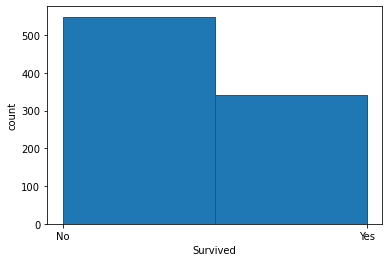

In [5]:
import matplotlib.pyplot as plt
plt.hist(data['Survived'], bins=2 , edgecolor='Red');
plt.xlabel('Survived');
plt.ylabel('count');

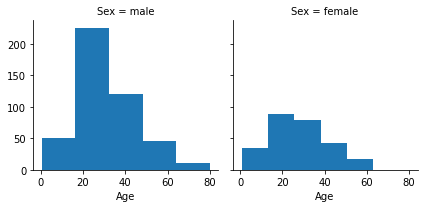

In [17]:
import seaborn as sns
g=sns.FacetGrid(data,col='Sex')
g.map(plt.hist,'Age',bins=5)

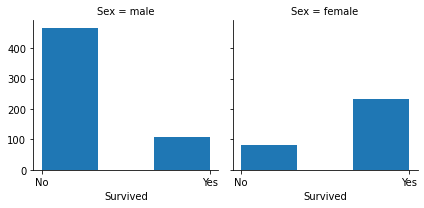

In [21]:
g=sns.FacetGrid(data,col='Sex')
g.map(plt.hist,'Survived',bins=3)

In [33]:
  
def plot_correlation_map( data ):
    corr = data.corr()
    s , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    s = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )
    

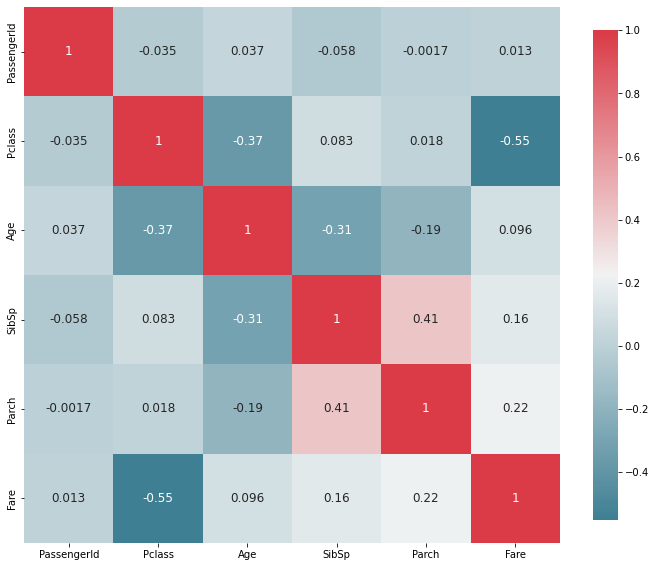

In [34]:
plot_correlation_map(data)

In [111]:
#'Survived' étant une variable non numeric , il faut la convertir en boolean pour avoir la moyenne#
data1= data.copy()
data1['Survived'] = data1['Survived'].map({'Yes': True, 'No': False}) 
data=data1.copy()
print (data)
    

     PassengerId  Survived  Pclass  \
0            343     False       2   
1             76     False       3   
2            641     False       3   
3            568     False       3   
4            672     False       1   
..           ...       ...     ...   
886           10      True       2   
887           61     False       3   
888          535     False       3   
889          102     False       3   
890          428      True       2   

                                                  Name     Sex   Age  SibSp  \
0                           Collander, Mr. Erik Gustaf    male  28.0      0   
1                              Moen, Mr. Sigurd Hansen    male  25.0      0   
2                               Jensen, Mr. Hans Peder    male  20.0      0   
3          Palsson, Mrs. Nils (Alma Cornelia Berglund)  female  29.0      0   
4                               Davidson, Mr. Thornton    male  31.0      1   
..                                                 ...     ...   ... 

In [ ]:
#This function generates the correlation matrix.The correlation matrix is a table with (n) rows (p) columns that crosses between the quantitative variables.The value of the correlation between 2 variables varies between -1 and 1.When the value is equal to 0 the correlation is null. 

In [114]:
data[["Pclass", "Survived"]].groupby("Pclass").mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [164]:
#Extract the title from the column Names.###
data["Title1"] = data["Name"].str.split(".").str.get(0)
data["Title"] = data["Title1"].str.split(",").str.get(1)
data = data.drop(['Title1'], axis=1)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,343,False,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S,Mr
1,76,False,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S,Mr
2,641,False,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S,Mr
3,568,False,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S,Mrs
4,672,False,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S,Mr


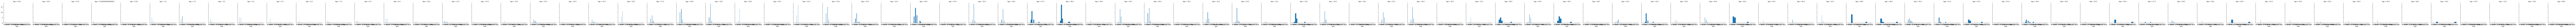

In [142]:
#Correlation betwen title and sexe, age,Fare...#
g=sns.FacetGrid(data,col='Age')
g.map(plt.hist,'Title',bins=10)


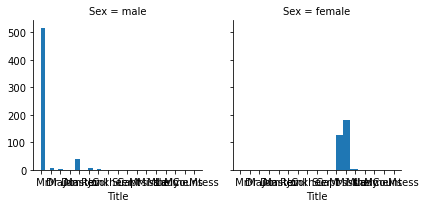

In [143]:
g=sns.FacetGrid(data,col='Sex')
g.map(plt.hist,'Title',bins=20)

In [170]:
Title_Dictionary = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Sir" : "Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    "the Countess":"Royalty",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Master",
    "Lady" : "Royalty"
}   
data['Title'] =data.Title.map(Title_Dictionary)
return data

SyntaxError: 'return' outside function (650979183.py, line 21)

In [174]:
data['Title'].head(100)

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
     ... 
95    NaN
96    NaN
97    NaN
98    NaN
99    NaN
Name: Title, Length: 100, dtype: object

In [177]:
def get_titles():
    global data
    data['Title'] = data['Name'].map(lambda name: name.split(',')[1].split('.')[0].strip())

    Title_Dictionary = {
        "Capt": "Officer",
        "Col": "Officer",
        "Major": "Officer",
        "Jonkheer": "Royalty",
        "Don": "Royalty",
        "Sir": "Royalty",
        "Dr": "Officer",
        "Rev": "Officer",
        "the Countess": "Royalty",
        "Dona": "Royalty",
        "Mme": "Mrs",
        "Mlle": "Miss",
        "Ms": "Mrs",
        "Mr": "Mr",
        "Mrs": "Mrs",
        "Miss": "Miss",
        "Master": "Master",
        "Lady": "Royalty"

    }
    data['Title'] = data.Title.map(Title_Dictionary)
data = get_titles()
data.head()

TypeError: 'NoneType' object is not subscriptable